<a href="https://colab.research.google.com/github/starmath4/Tarea/blob/main/Nov24-25/Nov_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tuve problemas con la salida, no pude aumentar la precisión ni disminuir la perdida en las epocas

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd

%matplotlib inline

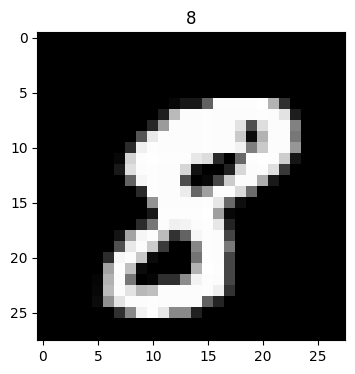

In [ ]:
data = pd.read_csv("/content/train_nov24.csv")
etiquetas = data.iloc[:, 0]  #la etiqueta
imagenes = data.iloc[:, 1:].values  #los pixeles

indice_imagen = 10
imagen = imagenes[indice_imagen, :].reshape(28, 28)  #matriz de 28x28

plt.figure(figsize=(4, 4))
plt.imshow(imagen, cmap='gray')  #escala de grises
plt.title(etiquetas.iloc[indice_imagen])
plt.show()


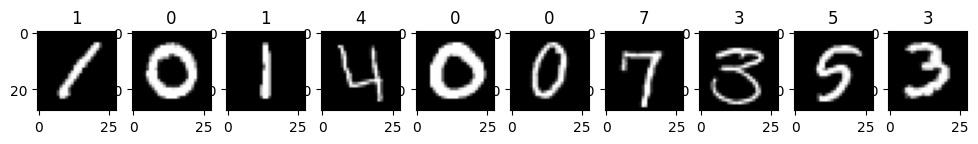

In [ ]:
etiquetas = data.iloc[:, 0]  #etiqeutas
imagenes = data.iloc[:, 1:].values  #pixeles

#mostrar 10 imagenes
showimg = 10
fig, axes = plt.subplots(1, showimg, figsize=(12, 3))

for i in range(showimg):
    imagen = imagenes[i, :].reshape(28, 28)  #etiqueta y matriz de 28x28
    axes[i].imshow(imagen, cmap='gray')  #escala de grises
    axes[i].set_title(etiquetas.iloc[i])  # Muestra la etiqueta correspondiente a la imagen

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42,shuffle="True")

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compilación del modelo
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
79/79 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.2851 - val_loss: nan - val_accuracy: 0.1031
Epoch 2/50
79/79 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 3/50
79/79 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 4/50
79/79 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 5/50
79/79 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 6/50
79/79 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 7/50
79/79 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.1031
Epoch 8/50
79/79 [==============================] - 2s 20

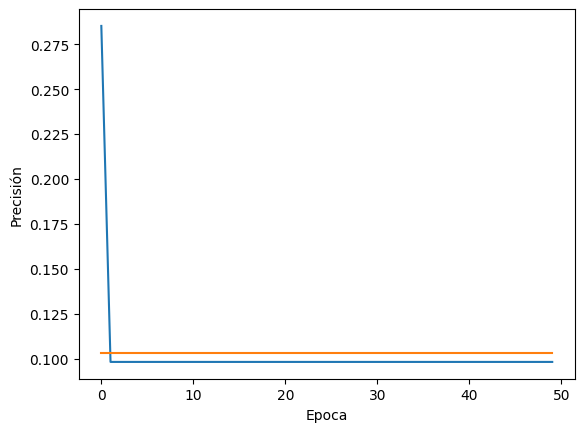

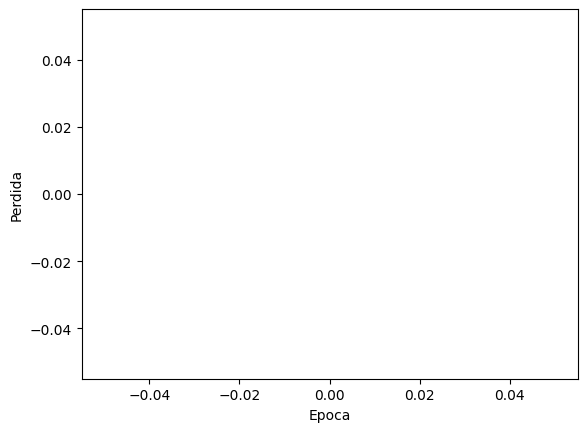

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Precisión')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Perdida valor')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.show()

40/40 [==============================] - 0s 7ms/step


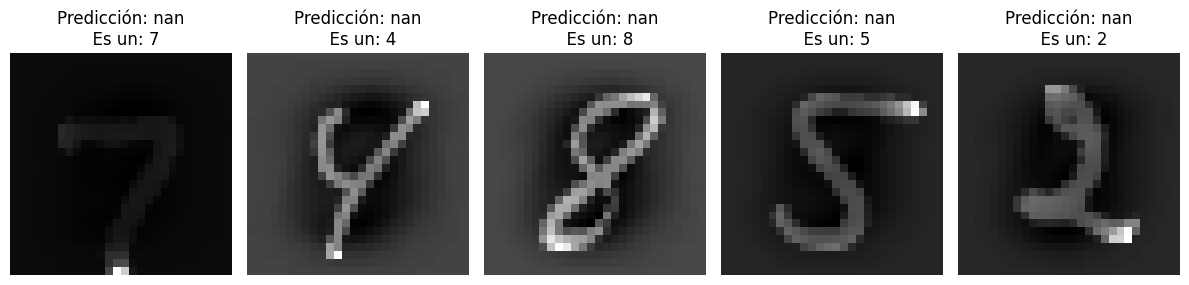

In [ ]:
predictions = model.predict(X_test)

# Mostrar algunos ejemplos del conjunto de validación
num_ejemplos = 5
plt.figure(figsize=(12, 4))
for i in range(num_ejemplos):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Mostrar la imagen
    plt.title(f'Predicción: {predictions[i][0]:.2f}\n  Es un: {y_test.iloc[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()